## Twitter analysis 7 days

In [2]:
pip install textblob

  Using cached https://files.pythonhosted.org/packages/60/f0/1d9bfcc8ee6b83472ec571406bd0dd51c0e6330ff1a51b2d29861d389e85/textblob-0.15.3-py2.py3-none-any.whl
     |████████████████████████████████| 1.5MB 949kB/s eta 0:00:01
  Created wheel for nltk: filename=nltk-3.4.5-cp37-none-any.whl size=1449910 sha256=542cea94b9118996ab8c775dc0ce16c82e981a49cd9f1254be1a14718a4099b7
  Stored in directory: /Users/vincent/Library/Caches/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
Successfully built nltk
Note: you may need to restart the kernel to use updated packages.


In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Jun 19 14:57:35 2019

@author: yoko
"""
#### Twitter_analysis_1

import tweepy
#import json
import pandas as pd
#from scipy.misc import imread
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#import matplotlib as mpl
#import csv
import matplotlib.pyplot as plt

#import operator
from textblob import TextBlob
#from textblob import Word
#from textblob.sentiments import NaiveBayesAnalyzer

#For Graph
import numpy as np
from matplotlib import rc

In [4]:
#### Twitter_analysis_2
#Authentication

consumer_key = '0pW44wwmZ3ft7FXAf5JZxPW8y'
consumer_secret = 'YJxLt7QER3O3Gvd0JerTgzZaKHssQxL51eBbnQUK3r0SYWm6vL'
access_token = '212782440-AodAkix83Py5tjj9uyPSPfigBIOZLT2fRks2NEuA'
access_token_secret = 'qyieBwlIONEKXw78wvqAhELQDKleUHs9KHHyGeYgCOFIn'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret) #Interacting with twitter's API
auth.set_access_token(access_token, access_token_secret)
#api = tweepy.API (auth) #creating the API object
api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
#Extracting Tweets

keyword = 'Apple'
keyword_stock_name = 'AAPL'
#keyword = 'Amazon'
#keyword_stock_name = 'AMZN'
#keyword = 'Facebook'
#keyword_stock_name = 'FB'
#keyword = 'Google'
#keyword_stock_name = 'GOOGL'
#keyword = 'Boeing'
#keyword_stock_name = 'BA'
#keyword = 'Microsoft'
#keyword_stock_name = 'MSFT'
num_of_tweets_extracted = 100
choose_lang = "en"
num_of_date = 7

print('keyword: ', keyword)
print('keyword stock name: ', keyword_stock_name)
print('num_of_tweets_extracted: ', num_of_tweets_extracted)
print('num_of_date: ', num_of_date)

#from datetime import datetime
#today = str(datetime.today())
#print(today)   # '2017-12-26'
#
#datetime.today().strftime('%Y-%m-%d')
#
#twitter_search_date = ('2019-06-11', '2019-06-12', '2019-06-13', '2019-06-14', '2019-06-17', '2019-06-18')

import datetime
#datetime_object = datetime.datetime.now()
datetime_object = datetime.date.today()
print(datetime_object)
#print('timestamp:', datetime_object.timestamp())
print('date:', datetime_object)
from datetime import timedelta
print('timedelta_of_a_day:', timedelta(days = 1))
from datetime import datetime
today_minus_a_week = datetime_object - timedelta(days = num_of_date)
#aa = datetime_object.timestamp() + timedelta(days = 1)
#print('from timestamp:', datetime.fromtimestamp(datetime_object.timestamp()))
print('today minus num_of_date:', today_minus_a_week)

keyword:  Apple
keyword stock name:  AAPL
num_of_tweets_extracted:  100
num_of_date:  7
2019-09-18
date: 2019-09-18
timedelta_of_a_day: 1 day, 0:00:00
today minus num_of_date: 2019-09-11


start:  2019-09-11
end:  2019-09-12
start:  2019-09-12
end:  2019-09-13
start:  2019-09-13
end:  2019-09-14
start:  2019-09-14
end:  2019-09-15
start:  2019-09-15
end:  2019-09-16
start:  2019-09-16
end:  2019-09-17
start:  2019-09-17
end:  2019-09-18


/Users/vincent/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


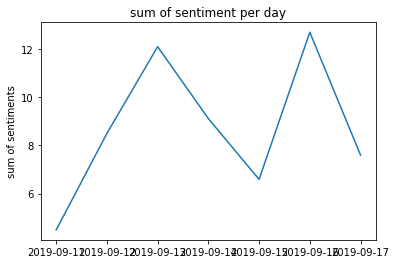

In [6]:
twitter_search_date = []

twitter_sentiment = []
twitter_count_sentiment = []
twitter_count_sentiment_plusretweet = []
twitter_value_sentiment = []

for dd in range(num_of_date):
    day_plus_days = datetime_object - timedelta(days = (num_of_date - dd))
    day_until = day_plus_days + timedelta(days=1)
    print('start: ', day_plus_days)
    print('end: ', day_until) 
    twitter_search_date.append(day_plus_days)

#for dd in range(len(twitter_search_date)-1):
    results = []
    count_negative_sentiment = 0
    count_neutral_sentiment = 0
    count_positive_sentiment = 0
    count_negative_sentiment_plusretweet = 0
    count_neutral_sentiment_plusretweet = 0
    count_positive_sentiment_plusretweet = 0
    value_negative_sentiment = 0.00
    value_neutral_sentiment = 0.00
    value_positive_sentiment = 0.00
    value_sentiment = 0.00
    
    #for tweet in tweepy.Cursor (api.search, q = 'apple', lang = "en").items(1000): 
    for tweet in tweepy.Cursor (api.search, q = keyword, lang = choose_lang, since = day_plus_days, until = day_until).items(num_of_tweets_extracted):     
    #for tweet in tweepy.Cursor (api.search, q = keyword, lang = "en", since = twitter_search_date[dd], until = twitter_search_date[dd] + timedelta(days = 1)).items(num_of_tweets_extracted): 
    #for tweet in tweepy.Cursor (api.search, q = keyword, lang = choose_lang, since = day_plus_days, until = day_plus_days + timedelta(days=1)).items(num_of_tweets_extracted):
        results.append(tweet)
    
    #### Twitter_analysis_3
    #Store tweets data in a dataframe

    def tweets_df(results):
        id_list = [tweet.id for tweet  in results]
        data_set = pd.DataFrame(id_list, columns = ["id"])
        data_set["text"] = [tweet.text for tweet in results]
        data_set["created_at"] = [tweet.created_at for tweet in results]
        data_set["retweet_count"] = [tweet.retweet_count for tweet in results]
        data_set["user_screen_name"] = [tweet.author.screen_name for tweet in results]
        data_set["user_followers_count"] = [tweet.author.followers_count for tweet in results]
        data_set["user_location"] = [tweet.author.location for tweet in results]
        data_set["Hashtags"] = [tweet.entities.get('hashtags') for tweet in results]
        return data_set
    data_set = tweets_df(results)


    # Remove tweets with duplicate text

    text = data_set["text"]

    for i in range(0,len(text)):
        txt = ' '.join(word for word in text[i] .split() if not word.startswith('https:'))
        #data_set.set_value(i, 'text2', txt)
        data_set.at[i, 'text2']= txt

    data_set.drop_duplicates('text2', inplace=True)
    data_set.reset_index(drop = True, inplace=True)
    data_set.drop('text', axis = 1, inplace = True)
    data_set.rename(columns={'text2': 'text'}, inplace=True)

    ### Twitter_analysys_4
    text = data_set["text"]

    for i in range(0,len(text)):
        textB = TextBlob(text[i])
        sentiment = textB.sentiment.polarity
        # data_set.set_value(i, 'Sentiment',sentiment)
        data_set.at[i, 'Sentiment'] = sentiment
        if sentiment <0.00:
            SentimentClass = 'Negative'
            # data_set.set_value(i, 'SentimentClass', SentimentClass )
            data_set.at[i, 'SentimentClass'] = SentimentClass
            count_negative_sentiment += 1
            count_negative_sentiment_plusretweet += data_set.at[i, "retweet_count"]+1
            value_negative_sentiment +=sentiment
        elif sentiment >0.00:
            SentimentClass = 'Positive'
            # data_set.set_value(i, 'SentimentClass', SentimentClass )
            data_set.at[i, 'SentimentClass'] = SentimentClass
            count_positive_sentiment += 1
            count_positive_sentiment_plusretweet += data_set.at[i, "retweet_count"]+1
            value_positive_sentiment +=sentiment
        else:
            SentimentClass = 'Neutral'
            # data_set.set_value(i, 'SentimentClass', SentimentClass )
            data_set[i, 'SentimentClass'] = SentimentClass
            count_neutral_sentiment += 1
            count_neutral_sentiment_plusretweet += data_set.at[i, "retweet_count"]+1
            value_neutral_sentiment +=sentiment

    twitter_sentiment.append(
        ((count_negative_sentiment,
        count_neutral_sentiment,
        count_positive_sentiment),
        (count_negative_sentiment_plusretweet,
        count_neutral_sentiment_plusretweet,
        count_positive_sentiment_plusretweet),
        (value_negative_sentiment,
        value_neutral_sentiment,
        value_positive_sentiment)))

#    twitter_count_sentiment.append(
#        (count_negative_sentiment,
#        count_neutral_sentiment,
#        count_positive_sentiment))
#
#    twitter_count_sentiment_plusretweet.append(
#        (count_negative_sentiment_plusretweet,
#        count_neutral_sentiment_plusretweet,
#        count_positive_sentiment_plusretweet))

    value_sentiment = value_negative_sentiment + value_neutral_sentiment + value_positive_sentiment
    twitter_value_sentiment.append(value_sentiment)


plt.plot(twitter_search_date, twitter_value_sentiment)
plt.ylabel('sum of sentiments')
plt.title('sum of sentiment per day')
plt.show()

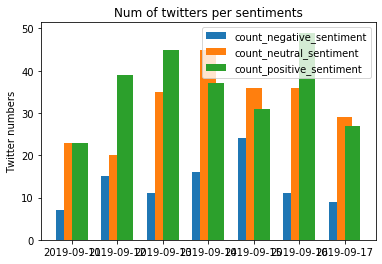

In [7]:
ind = np.arange(len(twitter_sentiment))  # the x locations for the groups
width = 0.35  # the width of the bars

twitter_count_negative_sentiment = list()
twitter_count_neutral_sentiment = list()
twitter_count_positive_sentiment = list()

for j in range(len(twitter_sentiment)):
    twitter_count_negative_sentiment.append(twitter_sentiment[j][0][0])
    twitter_count_neutral_sentiment.append(twitter_sentiment[j][0][1])
    twitter_count_positive_sentiment.append(twitter_sentiment[j][0][2])

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, twitter_count_negative_sentiment, width, label='count_negative_sentiment')
rects2 = ax.bar(ind, twitter_count_neutral_sentiment, width, label='count_neutral_sentiment')
rects3 = ax.bar(ind + width/2, twitter_count_positive_sentiment, width, label='count_positive_sentiment')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Twitter numbers')
ax.set_title('Num of twitters per sentiments')
ax.set_xticks(ind)
ax.set_xticklabels(twitter_search_date)
ax.legend()

AAPL
2019-09-11
2019-09-18
[*********************100%***********************]  1 of 1 downloaded


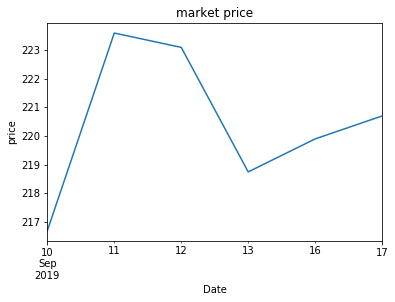

In [11]:
import yfinance as yf
print(keyword_stock_name)
print(today_minus_a_week)
print(datetime_object)
data = yf.download(keyword_stock_name, today_minus_a_week, datetime_object)
data.Close.plot()

plt.ylabel('price')
plt.title('market price')
plt.show()

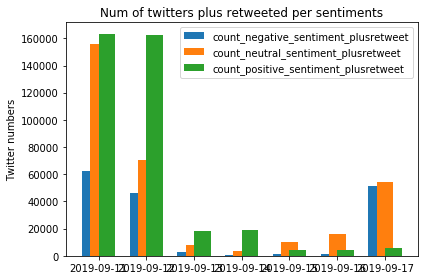

In [12]:
### plus retweet ###

ind = np.arange(len(twitter_sentiment))  # the x locations for the groups
width = 0.35  # the width of the bars

twitter_count_negative_sentiment_plusretweet = list()
twitter_count_neutral_sentiment_plusretweet = list()
twitter_count_positive_sentiment_plusretweet = list()

for j in range(len(twitter_sentiment)):
    twitter_count_negative_sentiment_plusretweet.append(twitter_sentiment[j][1][0])
    twitter_count_neutral_sentiment_plusretweet.append(twitter_sentiment[j][1][1])
    twitter_count_positive_sentiment_plusretweet.append(twitter_sentiment[j][1][2])

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, twitter_count_negative_sentiment_plusretweet, width, label='count_negative_sentiment_plusretweet')
rects2 = ax.bar(ind, twitter_count_neutral_sentiment_plusretweet, width, label='count_neutral_sentiment_plusretweet')
rects3 = ax.bar(ind + width/2, twitter_count_positive_sentiment_plusretweet, width, label='count_positive_sentiment_plusretweet')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Twitter numbers')
ax.set_title('Num of twitters plus retweeted per sentiments')
ax.set_xticks(ind)
ax.set_xticklabels(twitter_search_date)
ax.legend()
fig.tight_layout()

plt.show()